In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler

#Selecionar arquivo CSV na janela do Windows que servirá como base de dados
import tkinter as tk
from tkinter import filedialog
root = tk.Tk()
root.withdraw()
caminhoArquivoDados = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])

In [2]:
#### le arquivo CSV e cria DataFrame "df" ####

df = pd.read_csv(caminhoArquivoDados)

# Exclui linhas com valores faltantes
df.dropna(inplace=True)

# Exclui linhas com valores inválidos
condicaoNotasInvalidas = ((df['math score'] > 100) | (df['math score'] < 0) | 
                         (df['reading score'] > 100) | (df['reading score'] < 0) | 
                         (df['writing score'] > 100) | (df['writing score'] < 0))

df.drop(df.loc[condicaoNotasInvalidas].index, inplace=True)

In [3]:
'''
O modelo escolhido foi a regressão logística. Como um algoritmo de classificação que estima a probabilidade de um evento ocorrer,
podemos estimar a aprovação ou não de um aluno com base em um conjunto de variáveis independentes, que no nosso caso foram:
Educação dos pais, tipo de alimentação, grupo étnico, curso preparatório e gênero.
'''

'\nO modelo escolhido foi a regressão logística. Como um algoritmo de classificação que estima a probabilidade de um evento ocorrer,\npodemos estimar a aprovação ou não de um aluno com base em um conjunto de variáveis independentes, que no nosso caso foram:\nEducação dos pais, tipo de alimentação, grupo étnico, curso preparatório e gênero.\n'

In [4]:
# Calcular a média das notas
df['media_notas'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Definir a variável alvo com base na média das notas
df['aprovacao'] = df['media_notas'] > 70

# Transformar as variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

# Normalizar dados (OBS: Desnecessário para nosso conjunto de dados)
scaler = StandardScaler()
scaler.fit(df)

# Definir as features (variáveis independentes) e o alvo (variável dependente)
df_features = df.drop(['math score', 'reading score', 'writing score', 'media_notas', 'aprovacao'], axis=1)
df_target = df['aprovacao']


In [5]:
############ Treinar o modelo

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=300)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

Acurácia: 0.64
Matriz de Confusão:
 [[99 48]
 [60 93]]
Precisão: 0.6595744680851063
F1-score: 0.6326530612244897


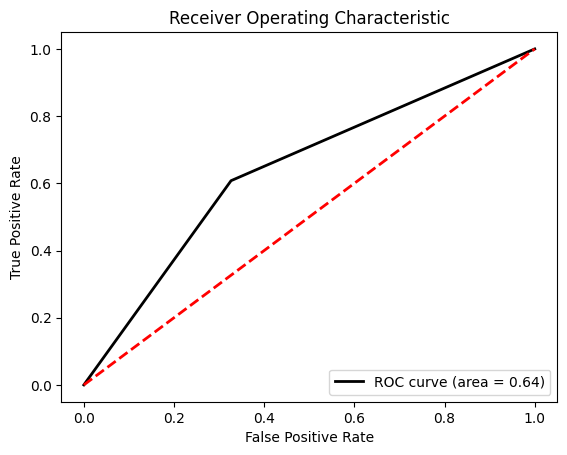

In [6]:
######## Métricas de avaliação do modelo

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print('Acurácia:', accuracy)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:\n', confusion)

# Calcular a precisão (VP/(VP+FP))
precision = precision_score(y_test, predictions)
print('Precisão:', precision)

# Calcular o F1-score
f1 = f1_score(y_test, predictions)
print('F1-score:', f1)

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

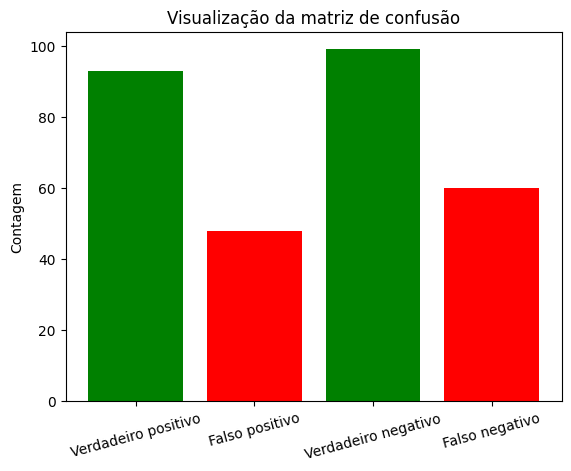

In [7]:
# Calcular as contagens de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
tp = np.sum((predictions == 1) & (y_test == 1))
fp = np.sum((predictions == 1) & (y_test == 0))
tn = np.sum((predictions == 0) & (y_test == 0))
fn = np.sum((predictions == 0) & (y_test == 1))

# Criar as barras com cores
labels = ['Verdadeiro positivo', 'Falso positivo', 'Verdadeiro negativo', 'Falso negativo']
counts = [tp, fp, tn, fn]
colors = ['green', 'red', 'green', 'red']

plt.bar(labels, counts, color=colors)

plt.xticks(rotation=15)  # Rotacionar o texto em 15°
plt.ylabel('Contagem')
plt.title('Visualização da matriz de confusão')
plt.show()